In [4]:
using DataFrames, Gadfly

In [10]:
data = readtable("deseasonalizedtraining.csv")

,Month,Text_General_Code,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,Month_Number,Avg,deseasonalized
1,2006-01-01T00:00:00,Aggravated Assault,733,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,662.8333333333334,1.1058586874528538
2,2006-01-01T00:00:00,All Other Offenses,4252,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,2881.3333333333335,1.4757056918093474
3,2006-01-01T00:00:00,Arson,44,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,46.666666666666664,0.942857142857143
4,2006-01-01T00:00:00,Burglary,906,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,950.8333333333334,0.9528483786152497
5,2006-01-01T00:00:00,DRIVING UNDER THE INFLUENCE,425,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,449.0,0.9465478841870824
6,2006-01-01T00:00:00,Disorderly Conduct,381,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,330.5,1.1527987897125567
7,2006-01-01T00:00:00,Drinking Violation,63,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,60.5,1.0413223140495869
8,2006-01-01T00:00:00,Embezzlement,40,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,38.833333333333336,1.0300429184549356
9,2006-01-01T00:00:00,Forgery and Counterfeiting,68,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,52.5,1.2952380952380953
10,2006-01-01T00:00:00,Fraud,777,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,791.3333333333334,0.9818871103622577


In [11]:
data[:Month] = DateTime(data[:Month],"yyyy-mm-ddTHH:MM:SS");

In [12]:
DThefts = data[data[:Text_General_Code].=="Thefts",:]

,Month,Text_General_Code,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,Month_Number,Avg,deseasonalized
1,2006-01-01T00:00:00,Thefts,3644,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,3424.8333333333335,1.063993381673074
2,2006-02-01T00:00:00,Thefts,2963,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.42857143,27.78571429,35.60714286,-0.15,29.14285714,0.0,0.053928571,0.428571429,0.964285714,2,2817.8333333333335,1.0515171230851126
3,2006-03-01T00:00:00,Thefts,3496,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53.4516129,35.5483871,44.5,0.94516129,20.25806452,0.032258065,0.029354839,0.0,0.0,3,3407.1666666666665,1.0260724942523114
4,2006-04-01T00:00:00,Thefts,3408,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67.03333333,46.26666667,56.65,2.646666667,8.366666667,0.366666667,0.123666667,0.003333333,0.0,4,3521.0,0.9679068446464073
5,2006-05-01T00:00:00,Thefts,4089,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.83870968,54.25806452,64.5483871,0.648387097,2.64516129,2.451612903,0.069677419,0.0,0.0,5,3871.8333333333335,1.056088846799535
6,2006-06-01T00:00:00,Thefts,4007,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.9,64.66666667,72.78333333,-0.466666667,0.066666667,8.0,0.265,0.0,0.0,6,3962.6666666666665,1.0111877523553163
7,2006-07-01T00:00:00,Thefts,4317,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.35483871,70.48387097,79.41935484,1.267741935,0.0,14.64516129,0.137741935,0.0,0.0,7,4077.1666666666665,1.0588235294117647
8,2006-08-01T00:00:00,Thefts,4462,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.48387097,69.74193548,78.11290323,1.525806452,0.0,13.32258065,0.126774194,0.0,0.0,8,4135.666666666667,1.078907068590312
9,2006-09-01T00:00:00,Thefts,4364,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.96666667,59.26666667,67.11666667,-2.033333333,1.133333333,3.4,0.199,0.0,0.0,9,3991.5,1.093323312038081
10,2006-10-01T00:00:00,Thefts,4479,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64.96774194,47.38709677,56.17741935,-1.319354839,9.064516129,0.548387097,0.207096774,0.0,0.0,10,4060.6666666666665,1.1030208504350683


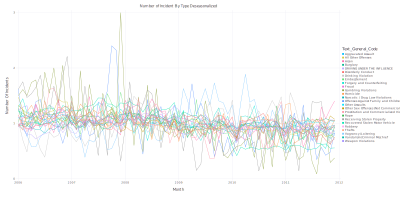

In [16]:
set_default_plot_size(40cm,20cm)
plot(data,x=:Month,y=:deseasonalized,color=:Text_General_Code,Geom.line,Guide.ylabel("Number Of Incidents"),Guide.title("Number of Incident By Type Deseasonalized"))

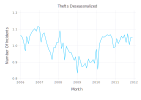

In [15]:
plot(DThefts,x=:Month,y=:deseasonalized,Geom.line,Guide.ylabel("Number Of Incidents"),Guide.title("Thefts Deseasonalized"))

In [17]:
DOthers = data[data[:Text_General_Code].=="All Other Offenses",:]

,Month,Text_General_Code,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,Month_Number,Avg,deseasonalized
1,2006-01-01T00:00:00,All Other Offenses,4252,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,2881.3333333333335,1.4757056918093474
2,2006-02-01T00:00:00,All Other Offenses,3395,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.42857143,27.78571429,35.60714286,-0.15,29.14285714,0.0,0.053928571,0.428571429,0.964285714,2,2720.5,1.2479323653740122
3,2006-03-01T00:00:00,All Other Offenses,3677,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53.4516129,35.5483871,44.5,0.94516129,20.25806452,0.032258065,0.029354839,0.0,0.0,3,3409.3333333333335,1.078509972624169
4,2006-04-01T00:00:00,All Other Offenses,4400,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67.03333333,46.26666667,56.65,2.646666667,8.366666667,0.366666667,0.123666667,0.003333333,0.0,4,3648.6666666666665,1.2059199707655766
5,2006-05-01T00:00:00,All Other Offenses,3697,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.83870968,54.25806452,64.5483871,0.648387097,2.64516129,2.451612903,0.069677419,0.0,0.0,5,3521.1666666666665,1.0499361007241919
6,2006-06-01T00:00:00,All Other Offenses,5014,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80.9,64.66666667,72.78333333,-0.466666667,0.066666667,8.0,0.265,0.0,0.0,6,4028.6666666666665,1.2445805063710078
7,2006-07-01T00:00:00,All Other Offenses,4956,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.35483871,70.48387097,79.41935484,1.267741935,0.0,14.64516129,0.137741935,0.0,0.0,7,4264.5,1.162152655645445
8,2006-08-01T00:00:00,All Other Offenses,5381,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86.48387097,69.74193548,78.11290323,1.525806452,0.0,13.32258065,0.126774194,0.0,0.0,8,4453.166666666667,1.2083536060481304
9,2006-09-01T00:00:00,All Other Offenses,3692,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74.96666667,59.26666667,67.11666667,-2.033333333,1.133333333,3.4,0.199,0.0,0.0,9,3002.3333333333335,1.2297102253802596
10,2006-10-01T00:00:00,All Other Offenses,4072,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64.96774194,47.38709677,56.17741935,-1.319354839,9.064516129,0.548387097,0.207096774,0.0,0.0,10,2839.5,1.4340552914245466


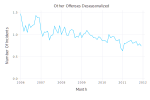

In [25]:
set_default_plot_size(15cm,10cm)
plot(DOthers,x=:Month,y=:deseasonalized,Geom.line,Guide.ylabel("Number Of Incidents"),Guide.title("Other Offenses Deseasonalized"))

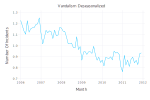

In [26]:
DVandalism = data[data[:Text_General_Code].=="Vandalism/Criminal Mischief",:]
plot(DVandalism,x=:Month,y=:deseasonalized,Geom.line,Guide.ylabel("Number Of Incidents"),Guide.title("Vandalism Deseasonalized"))